In [2]:
#--- Cargamos el paquete torch y otras utilidades
import torch
from torch.autograd import Variable # Para convertir nuestras varaibles a tensores
import torch.utils.data as Data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
#--- Cargamos datos

data = pd.read_csv('MLP_regresion.csv')
data.head()

,X,Y
0,-10.00000,0.929135
1,-9.97998,0.634406
2,-9.95996,0.946741
3,-9.93994,0.578634
4,-9.91992,0.721276


In [81]:
X = np.array(data['X'])
Y = np.array(data['Y'])
np.shape(X), np.shape(Y)

((1000,), (1000,))

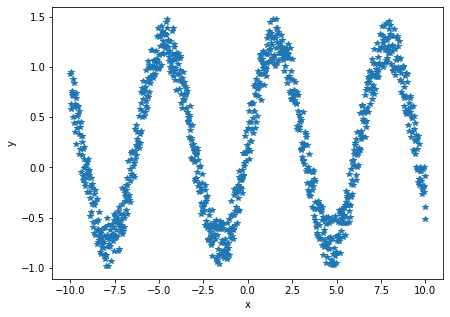

In [82]:
#--- Visualizamos los datos

fig = plt.figure(figsize=(7,5))
plt.plot(X,Y,'*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [83]:
#--- Convertimos los numpy a tensores

X = Variable(torch.from_numpy(X)).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(Y)).float()
Y = torch.unsqueeze(Y,dim=1)

In [176]:
#--- Definimos la ANN
input_dim = 1
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 100),
                torch.nn.ReLU(),
                torch.nn.Linear(100, 50),
                torch.nn.ReLU(),
                torch.nn.Linear(50,25),
                torch.nn.ReLU(),
                torch.nn.Linear(25,input_dim),
                )
model

Sequential(
  (0): Linear(in_features=1, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=25, bias=True)
  (5): ReLU()
  (6): Linear(in_features=25, out_features=1, bias=True)
)

In [177]:
#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.SGD(model.parameters(), lr=0.02)
criterion = torch.nn.MSELoss()

Epoch: [1/1], loss: 0.7082787752151489


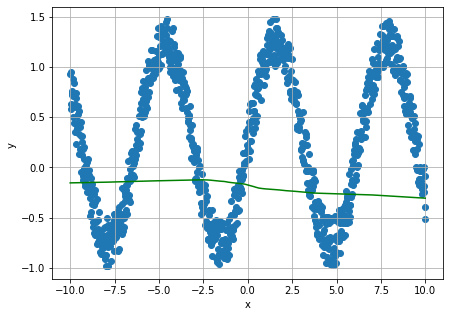

Epoch: [1/1001], loss: 0.19299185276031494


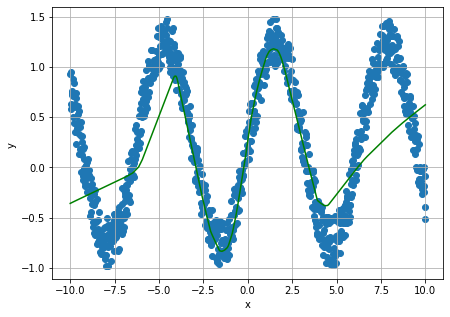

Epoch: [1/2001], loss: 0.11321597546339035


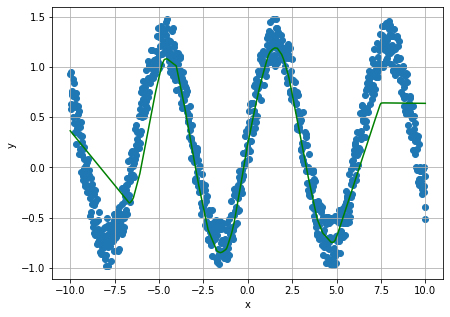

Epoch: [1/3001], loss: 0.08870024234056473


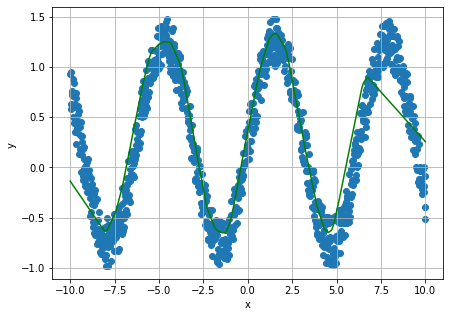

Epoch: [1/4001], loss: 0.07206520438194275


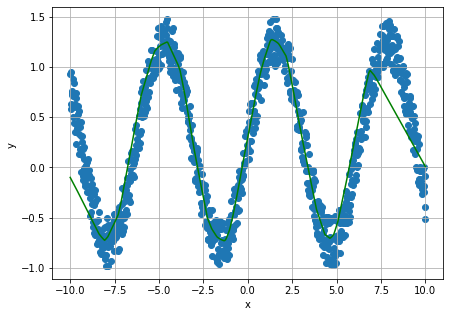

Epoch: [1/5001], loss: 0.05865344777703285


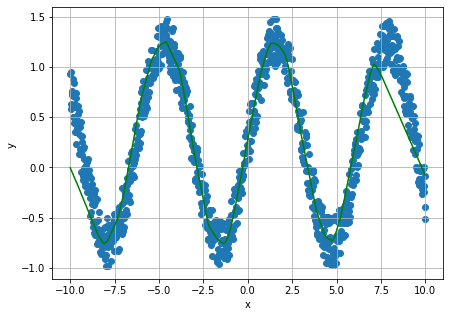

In [178]:
#-- Definimos el número de épocas
n_epoch = 5001
loss_list = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%1000 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y ')
      plt.show()

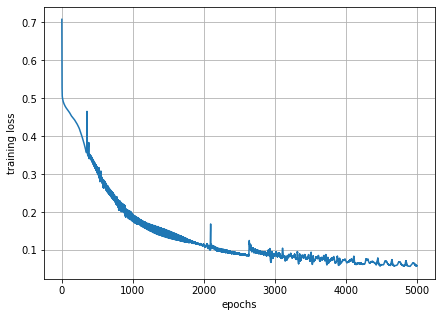

In [179]:
#-- Graficamos la perdida
fig = plt.figure(figsize=(7, 5))
plt.plot(loss_list)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()

#Modelo 2

In [286]:
#--- Definimos la ANN
input_dim = 1
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 25),
                torch.nn.ReLU(),
                torch.nn.Linear(25, 15),
                torch.nn.ReLU(),
                torch.nn.Linear(15, input_dim),
                )
model

Sequential(
  (0): Linear(in_features=1, out_features=25, bias=True)
  (1): ReLU()
  (2): Linear(in_features=25, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=1, bias=True)
)

In [287]:
#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
criterion = torch.nn.MSELoss()

Epoch: [1/1], loss: 1.6245037317276


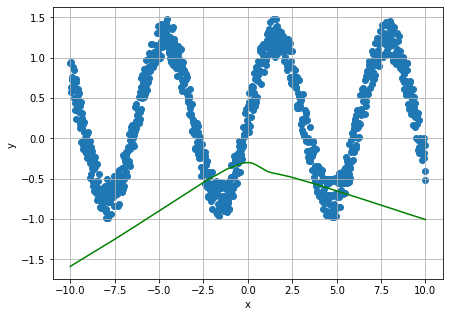

Epoch: [1/1001], loss: 0.3261258602142334


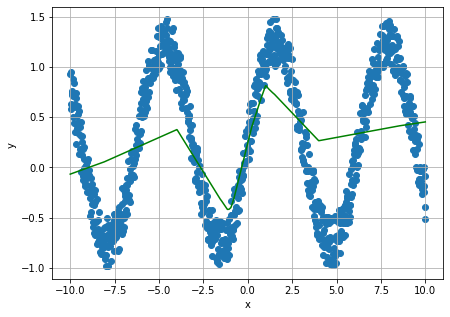

Epoch: [1/2001], loss: 0.20345279574394226


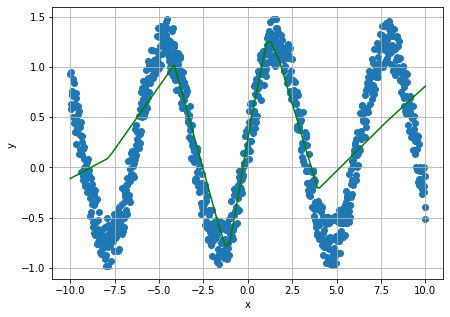

Epoch: [1/3001], loss: 0.16538001596927643


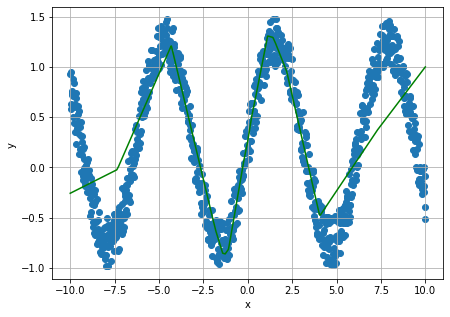

Epoch: [1/4001], loss: 0.15007728338241577


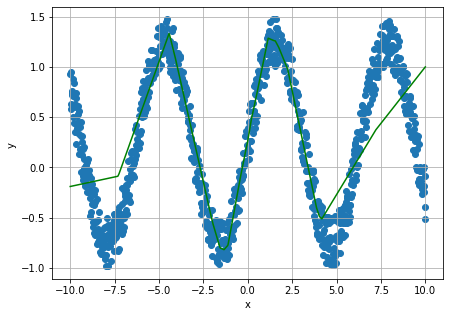

Epoch: [1/5001], loss: 0.1371513456106186


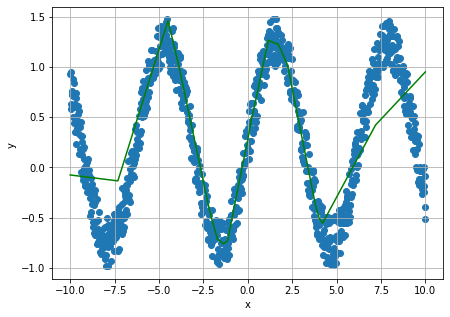

Epoch: [1/6001], loss: 0.12012341618537903


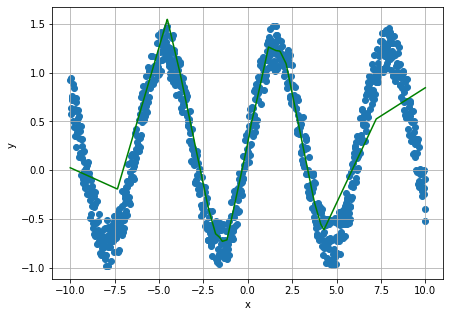

Epoch: [1/7001], loss: 0.09838860481977463


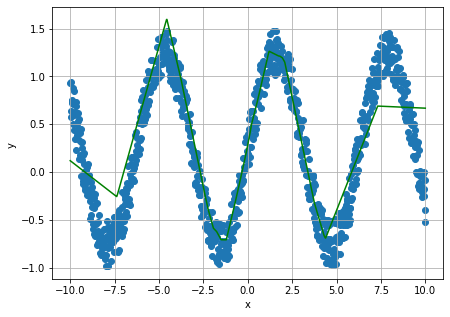

Epoch: [1/8001], loss: 0.07493901252746582


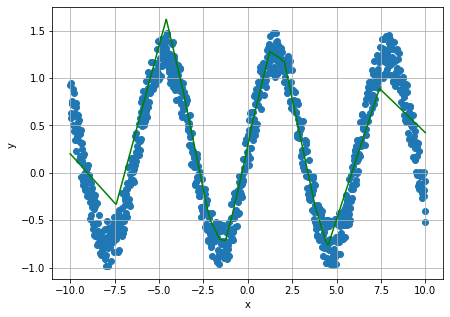

Epoch: [1/9001], loss: 0.06342636793851852


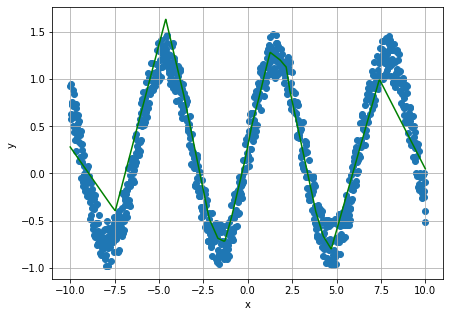

Epoch: [1/10001], loss: 0.05720305070281029


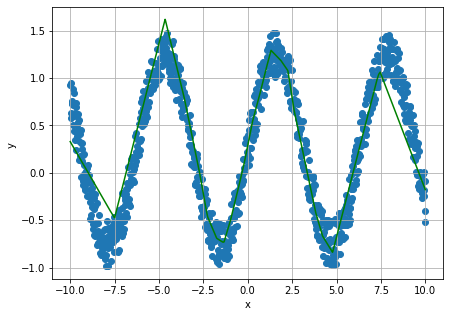

In [288]:
#-- Definimos el número de épocas
n_epoch = 10001
loss_list = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%1000 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y ')
      plt.show()

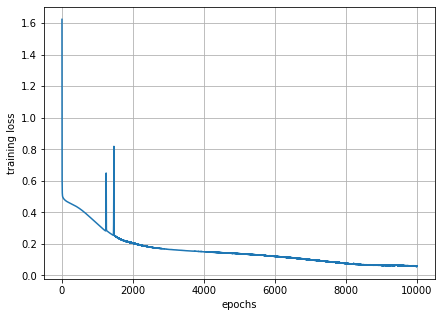

In [289]:
#-- Graficamos la perdida
fig = plt.figure(figsize=(7, 5))
plt.plot(loss_list)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()

#Explicación
### Para este ejercicio elegí dos modelos que se diferencian esencialmente en el número de capas y en el número de neuronas por capa, ya que el primero posee más neuronas en las primeras capas y más capas de profundidad, además la taza de aprendizaje fue 2 veces más grande en el primer modelo. Ambos modelos llegaron a un resultado óptimo (pérdida por debajo de 0.1), sin embargo, la diferencia estuvo en cómo llegaron, el primer modelo llego en la mitad de épocas que el segundo pero la forma de la curva de pérdida es un poco más caótica sobretodo en la parte final, mientras que para el segundo modelo esto fue un poco más suave. En términos de llegar a la respuesta ambos modelos funcionaron igual, en cuanto a la forma funcionó mejor el segundo principalmente debido a la taza de aprendizaje que para el primer modelo al ser tan alta (cualquier taza mayor a 0.02 hacía que nunca se llegara a un fit adecuado) no permitía que el modelo pudiera hacer las pequeñas correcciones al final del procedimiento, mientras que si esta se reduce permite hacer estas correcciones de manera más suave pero utilizando más épocas. Sin embargo, el tiempo de cómputo de ambos modelos fue muy similar por lo que en este caso la cantidad de épocas no me parece un factor demasiado importante para saber cual fue mejor. En conclusión, el modelo 2 fue mejor porque llegó a la respuesta de mejor manera.